In [1]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import re
from dateutil.parser import parse
import pickle
import string
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_percentage_error
import missingno as msno
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
import scipy
import researchpy as rp
from matplotlib.offsetbox import AnchoredText
#import pacmap
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split 
# Import Halving Grid Search
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb
from scipy.stats import kurtosis,skew
from numpy import mean,sqrt,square
from scipy.fftpack import fft, fftfreq
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import PredefinedSplit
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100

# SHAP Values

In [2]:
# read df full csv
df_features0=pd.read_csv('../../data/processed data/df_feature_engineering_18December2022.csv', parse_dates=['Timestamp'], index_col='Timestamp')#["2020":"2021"]
df_features0["TPH"]=df_features0["TPH"].shift(-10)
df_features0["loss of TPH"]=df_features0["loss of TPH"].shift(-10)
df_features0.dropna(inplace=True)
df_features0.sort_index(inplace=True)
df_features0.shape

(859325, 403)

In [3]:
# Sin power & water
u=[i for i in df_features0.columns if (not re.match(".*delta HH TPH",i)) and (not re.match(".*water",i)) and (not re.match(".*power",i)) ]
y=[i for i in df_features0.columns if  re.match(".*sag power index",i)]
u=y+u
df_features=df_features0[u].copy()
df_features.head(1)

,sag power index,mean_sag power index_10,max_sag power index_10,min_sag power index_10,rms_sag power index_10,var_sag power index_10,mean_sag power index_5,max_sag power index_5,min_sag power index_5,rms_sag power index_5,var_sag power index_5,mean_sag power index_3,max_sag power index_3,min_sag power index_3,rms_sag power index_3,var_sag power index_3,sag power index_(t-1),sag power index_(t-2),sag power index_(t-3),sag power index_(t-4),sag power index_(t-5),pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,ball work index,bornite law,charge cell,TPH,speed,HH TPH,granulometry,Edad,loss of TPH,solid percentage,HH charge cell,LL charge cell,delta HH charge cell,delta LL charge cell,mean_pyrite law_10,max_pyrite law_10,min_pyrite law_10,rms_pyrite law_10,var_pyrite law_10,mean_pyrite law_5,max_pyrite law_5,min_pyrite law_5,rms_pyrite law_5,var_pyrite law_5,mean_pyrite law_3,max_pyrite law_3,min_pyrite law_3,rms_pyrite law_3,var_pyrite law_3,mean_chalcopyrite law_10,max_chalcopyrite law_10,min_chalcopyrite law_10,rms_chalcopyrite law_10,var_chalcopyrite law_10,mean_chalcopyrite law_5,max_chalcopyrite law_5,min_chalcopyrite law_5,rms_chalcopyrite law_5,var_chalcopyrite law_5,mean_chalcopyrite law_3,max_chalcopyrite law_3,min_chalcopyrite law_3,rms_chalcopyrite law_3,var_chalcopyrite law_3,mean_chalcocite law_10,max_chalcocite law_10,min_chalcocite law_10,rms_chalcocite law_10,var_chalcocite law_10,mean_chalcocite law_5,max_chalcocite law_5,min_chalcocite law_5,rms_chalcocite law_5,var_chalcocite law_5,mean_chalcocite law_3,max_chalcocite law_3,min_chalcocite law_3,rms_chalcocite law_3,var_chalcocite law_3,mean_covelin law_10,max_covelin law_10,min_covelin law_10,rms_covelin law_10,var_covelin law_10,mean_covelin law_5,max_covelin law_5,min_covelin law_5,rms_covelin law_5,var_covelin law_5,mean_covelin law_3,max_covelin law_3,min_covelin law_3,rms_covelin law_3,var_covelin law_3,mean_crusher index_10,max_crusher index_10,min_crusher index_10,rms_crusher index_10,var_crusher index_10,mean_crusher index_5,max_crusher index_5,min_crusher index_5,rms_crusher index_5,var_crusher index_5,mean_crusher index_3,max_crusher index_3,min_crusher index_3,rms_crusher index_3,var_crusher index_3,mean_ball work index_10,max_ball work index_10,min_ball work index_10,rms_ball work index_10,var_ball work index_10,mean_ball work index_5,max_ball work index_5,min_ball work index_5,rms_ball work index_5,var_ball work index_5,mean_ball work index_3,max_ball work index_3,min_ball work index_3,rms_ball work index_3,var_ball work index_3,mean_bornite law_10,max_bornite law_10,min_bornite law_10,rms_bornite law_10,var_bornite law_10,mean_bornite law_5,max_bornite law_5,min_bornite law_5,rms_bornite law_5,var_bornite law_5,mean_bornite law_3,max_bornite law_3,min_bornite law_3,rms_bornite law_3,var_bornite law_3,mean_charge cell_10,max_charge cell_10,min_charge cell_10,rms_charge cell_10,var_charge cell_10,mean_charge cell_5,max_charge cell_5,min_charge cell_5,rms_charge cell_5,var_charge cell_5,mean_charge cell_3,max_charge cell_3,min_charge cell_3,rms_charge cell_3,var_charge cell_3,mean_speed_10,max_speed_10,min_speed_10,rms_speed_10,var_speed_10,mean_speed_5,max_speed_5,min_speed_5,rms_speed_5,var_speed_5,mean_speed_3,max_speed_3,min_speed_3,rms_speed_3,var_speed_3,mean_granulometry_10,max_granulometry_10,min_granulometry_10,rms_granulometry_10,var_granulometry_10,mean_granulometry_5,max_granulometry_5,min_granulometry_5,rms_granulometry_5,var_granulometry_5,mean_granulometry_3,max_granulometry_3,min_granulometry_3,rms_granulometry_3,var_granulometry_3,mean_solid percentage_10,max_solid percentage_10,min_solid percentage_10,rms_solid percentage_10,var_solid percentage_10,mean_solid percentage_5,max_solid percentage_5,min_solid percentage_5,rms_solid percentage_5,var_solid percentage_5,mean_solid percentage_3,max_solid percentage_3,min_solid percentage_3,rms_solid percentage_3,var_solid percentage_3,mean_HH charge cell_10,max_HH charge 

In [3]:
# Con power & water
u=[i for i in df_features0.columns if (not re.match(".*delta HH TPH",i))]
df_features=df_features0[u].copy()
df_features.head(1)

,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,charge cell,TPH,water,speed,HH TPH,granulometry,Edad,loss of TPH,power,solid percentage,HH charge cell,LL charge cell,delta HH charge cell,delta LL charge cell,mean_pyrite law_10,max_pyrite law_10,min_pyrite law_10,rms_pyrite law_10,var_pyrite law_10,mean_pyrite law_5,max_pyrite law_5,min_pyrite law_5,rms_pyrite law_5,var_pyrite law_5,mean_pyrite law_3,max_pyrite law_3,min_pyrite law_3,rms_pyrite law_3,var_pyrite law_3,mean_chalcopyrite law_10,max_chalcopyrite law_10,min_chalcopyrite law_10,rms_chalcopyrite law_10,var_chalcopyrite law_10,mean_chalcopyrite law_5,max_chalcopyrite law_5,min_chalcopyrite law_5,rms_chalcopyrite law_5,var_chalcopyrite law_5,mean_chalcopyrite law_3,max_chalcopyrite law_3,min_chalcopyrite law_3,rms_chalcopyrite law_3,var_chalcopyrite law_3,mean_chalcocite law_10,max_chalcocite law_10,min_chalcocite law_10,rms_chalcocite law_10,var_chalcocite law_10,mean_chalcocite law_5,max_chalcocite law_5,min_chalcocite law_5,rms_chalcocite law_5,var_chalcocite law_5,mean_chalcocite law_3,max_chalcocite law_3,min_chalcocite law_3,rms_chalcocite law_3,var_chalcocite law_3,mean_covelin law_10,max_covelin law_10,min_covelin law_10,rms_covelin law_10,var_covelin law_10,mean_covelin law_5,max_covelin law_5,min_covelin law_5,rms_covelin law_5,var_covelin law_5,mean_covelin law_3,max_covelin law_3,min_covelin law_3,rms_covelin law_3,var_covelin law_3,mean_crusher index_10,max_crusher index_10,min_crusher index_10,rms_crusher index_10,var_crusher index_10,mean_crusher index_5,max_crusher index_5,min_crusher index_5,rms_crusher index_5,var_crusher index_5,mean_crusher index_3,max_crusher index_3,min_crusher index_3,rms_crusher index_3,var_crusher index_3,mean_sag power index_10,max_sag power index_10,min_sag power index_10,rms_sag power index_10,var_sag power index_10,mean_sag power index_5,max_sag power index_5,min_sag power index_5,rms_sag power index_5,var_sag power index_5,mean_sag power index_3,max_sag power index_3,min_sag power index_3,rms_sag power index_3,var_sag power index_3,mean_ball work index_10,max_ball work index_10,min_ball work index_10,rms_ball work index_10,var_ball work index_10,mean_ball work index_5,max_ball work index_5,min_ball work index_5,rms_ball work index_5,var_ball work index_5,mean_ball work index_3,max_ball work index_3,min_ball work index_3,rms_ball work index_3,var_ball work index_3,mean_bornite law_10,max_bornite law_10,min_bornite law_10,rms_bornite law_10,var_bornite law_10,mean_bornite law_5,max_bornite law_5,min_bornite law_5,rms_bornite law_5,var_bornite law_5,mean_bornite law_3,max_bornite law_3,min_bornite law_3,rms_bornite law_3,var_bornite law_3,mean_charge cell_10,max_charge cell_10,min_charge cell_10,rms_charge cell_10,var_charge cell_10,mean_charge cell_5,max_charge cell_5,min_charge cell_5,rms_charge cell_5,var_charge cell_5,mean_charge cell_3,max_charge cell_3,min_charge cell_3,rms_charge cell_3,var_charge cell_3,mean_water_10,max_water_10,min_water_10,rms_water_10,var_water_10,mean_water_5,max_water_5,min_water_5,rms_water_5,var_water_5,mean_water_3,max_water_3,min_water_3,rms_water_3,var_water_3,mean_speed_10,max_speed_10,min_speed_10,rms_speed_10,var_speed_10,mean_speed_5,max_speed_5,min_speed_5,rms_speed_5,var_speed_5,mean_speed_3,max_speed_3,min_speed_3,rms_speed_3,var_speed_3,mean_granulometry_10,max_granulometry_10,min_granulometry_10,rms_granulometry_10,var_granulometry_10,mean_granulometry_5,max_granulometry_5,min_granulometry_5,rms_granulometry_5,var_granulometry_5,mean_granulometry_3,max_granulometry_3,min_granulometry_3,rms_granulometry_3,var_granulometry_3,mean_power_10,max_power_10,min_power_10,rms_power_10,var_power_10,mean_power_5,max_power_5,min_power_5,rms_power_5,var_power_5,mean_power_3,max_power_3,min_power_3,rms_power_3,var_power_3,mean_solid percentage_10,max_solid percentage_10,min_solid percentage_10,rms_solid percentage_10,var_solid perce

# Equilibrio de eventos de perdidas de TPH

In [4]:
# Entrenamiento
entrenamiento=pd.concat([df_features["2020-01":"2020-03"],df_features["2020-05"],df_features["2020-07":"2020-12"],df_features["2021-01":"2021-08"],df_features["2021-10"],df_features["2021-12"]])
entrenamiento.head(1)

,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,charge cell,TPH,water,speed,HH TPH,granulometry,Edad,loss of TPH,power,solid percentage,HH charge cell,LL charge cell,delta HH charge cell,delta LL charge cell,mean_pyrite law_10,max_pyrite law_10,min_pyrite law_10,rms_pyrite law_10,var_pyrite law_10,mean_pyrite law_5,max_pyrite law_5,min_pyrite law_5,rms_pyrite law_5,var_pyrite law_5,mean_pyrite law_3,max_pyrite law_3,min_pyrite law_3,rms_pyrite law_3,var_pyrite law_3,mean_chalcopyrite law_10,max_chalcopyrite law_10,min_chalcopyrite law_10,rms_chalcopyrite law_10,var_chalcopyrite law_10,mean_chalcopyrite law_5,max_chalcopyrite law_5,min_chalcopyrite law_5,rms_chalcopyrite law_5,var_chalcopyrite law_5,mean_chalcopyrite law_3,max_chalcopyrite law_3,min_chalcopyrite law_3,rms_chalcopyrite law_3,var_chalcopyrite law_3,mean_chalcocite law_10,max_chalcocite law_10,min_chalcocite law_10,rms_chalcocite law_10,var_chalcocite law_10,mean_chalcocite law_5,max_chalcocite law_5,min_chalcocite law_5,rms_chalcocite law_5,var_chalcocite law_5,mean_chalcocite law_3,max_chalcocite law_3,min_chalcocite law_3,rms_chalcocite law_3,var_chalcocite law_3,mean_covelin law_10,max_covelin law_10,min_covelin law_10,rms_covelin law_10,var_covelin law_10,mean_covelin law_5,max_covelin law_5,min_covelin law_5,rms_covelin law_5,var_covelin law_5,mean_covelin law_3,max_covelin law_3,min_covelin law_3,rms_covelin law_3,var_covelin law_3,mean_crusher index_10,max_crusher index_10,min_crusher index_10,rms_crusher index_10,var_crusher index_10,mean_crusher index_5,max_crusher index_5,min_crusher index_5,rms_crusher index_5,var_crusher index_5,mean_crusher index_3,max_crusher index_3,min_crusher index_3,rms_crusher index_3,var_crusher index_3,mean_sag power index_10,max_sag power index_10,min_sag power index_10,rms_sag power index_10,var_sag power index_10,mean_sag power index_5,max_sag power index_5,min_sag power index_5,rms_sag power index_5,var_sag power index_5,mean_sag power index_3,max_sag power index_3,min_sag power index_3,rms_sag power index_3,var_sag power index_3,mean_ball work index_10,max_ball work index_10,min_ball work index_10,rms_ball work index_10,var_ball work index_10,mean_ball work index_5,max_ball work index_5,min_ball work index_5,rms_ball work index_5,var_ball work index_5,mean_ball work index_3,max_ball work index_3,min_ball work index_3,rms_ball work index_3,var_ball work index_3,mean_bornite law_10,max_bornite law_10,min_bornite law_10,rms_bornite law_10,var_bornite law_10,mean_bornite law_5,max_bornite law_5,min_bornite law_5,rms_bornite law_5,var_bornite law_5,mean_bornite law_3,max_bornite law_3,min_bornite law_3,rms_bornite law_3,var_bornite law_3,mean_charge cell_10,max_charge cell_10,min_charge cell_10,rms_charge cell_10,var_charge cell_10,mean_charge cell_5,max_charge cell_5,min_charge cell_5,rms_charge cell_5,var_charge cell_5,mean_charge cell_3,max_charge cell_3,min_charge cell_3,rms_charge cell_3,var_charge cell_3,mean_water_10,max_water_10,min_water_10,rms_water_10,var_water_10,mean_water_5,max_water_5,min_water_5,rms_water_5,var_water_5,mean_water_3,max_water_3,min_water_3,rms_water_3,var_water_3,mean_speed_10,max_speed_10,min_speed_10,rms_speed_10,var_speed_10,mean_speed_5,max_speed_5,min_speed_5,rms_speed_5,var_speed_5,mean_speed_3,max_speed_3,min_speed_3,rms_speed_3,var_speed_3,mean_granulometry_10,max_granulometry_10,min_granulometry_10,rms_granulometry_10,var_granulometry_10,mean_granulometry_5,max_granulometry_5,min_granulometry_5,rms_granulometry_5,var_granulometry_5,mean_granulometry_3,max_granulometry_3,min_granulometry_3,rms_granulometry_3,var_granulometry_3,mean_power_10,max_power_10,min_power_10,rms_power_10,var_power_10,mean_power_5,max_power_5,min_power_5,rms_power_5,var_power_5,mean_power_3,max_power_3,min_power_3,rms_power_3,var_power_3,mean_solid percentage_10,max_solid percentage_10,min_solid percentage_10,rms_solid percentage_10,var_solid perce

In [5]:
# Validación
validacion=pd.concat([df_features["2020-06"],df_features["2021-11"]])
validacion.head(1)

,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,charge cell,TPH,water,speed,HH TPH,granulometry,Edad,loss of TPH,power,solid percentage,HH charge cell,LL charge cell,delta HH charge cell,delta LL charge cell,mean_pyrite law_10,max_pyrite law_10,min_pyrite law_10,rms_pyrite law_10,var_pyrite law_10,mean_pyrite law_5,max_pyrite law_5,min_pyrite law_5,rms_pyrite law_5,var_pyrite law_5,mean_pyrite law_3,max_pyrite law_3,min_pyrite law_3,rms_pyrite law_3,var_pyrite law_3,mean_chalcopyrite law_10,max_chalcopyrite law_10,min_chalcopyrite law_10,rms_chalcopyrite law_10,var_chalcopyrite law_10,mean_chalcopyrite law_5,max_chalcopyrite law_5,min_chalcopyrite law_5,rms_chalcopyrite law_5,var_chalcopyrite law_5,mean_chalcopyrite law_3,max_chalcopyrite law_3,min_chalcopyrite law_3,rms_chalcopyrite law_3,var_chalcopyrite law_3,mean_chalcocite law_10,max_chalcocite law_10,min_chalcocite law_10,rms_chalcocite law_10,var_chalcocite law_10,mean_chalcocite law_5,max_chalcocite law_5,min_chalcocite law_5,rms_chalcocite law_5,var_chalcocite law_5,mean_chalcocite law_3,max_chalcocite law_3,min_chalcocite law_3,rms_chalcocite law_3,var_chalcocite law_3,mean_covelin law_10,max_covelin law_10,min_covelin law_10,rms_covelin law_10,var_covelin law_10,mean_covelin law_5,max_covelin law_5,min_covelin law_5,rms_covelin law_5,var_covelin law_5,mean_covelin law_3,max_covelin law_3,min_covelin law_3,rms_covelin law_3,var_covelin law_3,mean_crusher index_10,max_crusher index_10,min_crusher index_10,rms_crusher index_10,var_crusher index_10,mean_crusher index_5,max_crusher index_5,min_crusher index_5,rms_crusher index_5,var_crusher index_5,mean_crusher index_3,max_crusher index_3,min_crusher index_3,rms_crusher index_3,var_crusher index_3,mean_sag power index_10,max_sag power index_10,min_sag power index_10,rms_sag power index_10,var_sag power index_10,mean_sag power index_5,max_sag power index_5,min_sag power index_5,rms_sag power index_5,var_sag power index_5,mean_sag power index_3,max_sag power index_3,min_sag power index_3,rms_sag power index_3,var_sag power index_3,mean_ball work index_10,max_ball work index_10,min_ball work index_10,rms_ball work index_10,var_ball work index_10,mean_ball work index_5,max_ball work index_5,min_ball work index_5,rms_ball work index_5,var_ball work index_5,mean_ball work index_3,max_ball work index_3,min_ball work index_3,rms_ball work index_3,var_ball work index_3,mean_bornite law_10,max_bornite law_10,min_bornite law_10,rms_bornite law_10,var_bornite law_10,mean_bornite law_5,max_bornite law_5,min_bornite law_5,rms_bornite law_5,var_bornite law_5,mean_bornite law_3,max_bornite law_3,min_bornite law_3,rms_bornite law_3,var_bornite law_3,mean_charge cell_10,max_charge cell_10,min_charge cell_10,rms_charge cell_10,var_charge cell_10,mean_charge cell_5,max_charge cell_5,min_charge cell_5,rms_charge cell_5,var_charge cell_5,mean_charge cell_3,max_charge cell_3,min_charge cell_3,rms_charge cell_3,var_charge cell_3,mean_water_10,max_water_10,min_water_10,rms_water_10,var_water_10,mean_water_5,max_water_5,min_water_5,rms_water_5,var_water_5,mean_water_3,max_water_3,min_water_3,rms_water_3,var_water_3,mean_speed_10,max_speed_10,min_speed_10,rms_speed_10,var_speed_10,mean_speed_5,max_speed_5,min_speed_5,rms_speed_5,var_speed_5,mean_speed_3,max_speed_3,min_speed_3,rms_speed_3,var_speed_3,mean_granulometry_10,max_granulometry_10,min_granulometry_10,rms_granulometry_10,var_granulometry_10,mean_granulometry_5,max_granulometry_5,min_granulometry_5,rms_granulometry_5,var_granulometry_5,mean_granulometry_3,max_granulometry_3,min_granulometry_3,rms_granulometry_3,var_granulometry_3,mean_power_10,max_power_10,min_power_10,rms_power_10,var_power_10,mean_power_5,max_power_5,min_power_5,rms_power_5,var_power_5,mean_power_3,max_power_3,min_power_3,rms_power_3,var_power_3,mean_solid percentage_10,max_solid percentage_10,min_solid percentage_10,rms_solid percentage_10,var_solid perce

In [6]:
# Test
test=pd.concat([df_features["2020-04"],df_features["2021-09"],df_features["2022"]])
test.head(1)

,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,charge cell,TPH,water,speed,HH TPH,granulometry,Edad,loss of TPH,power,solid percentage,HH charge cell,LL charge cell,delta HH charge cell,delta LL charge cell,mean_pyrite law_10,max_pyrite law_10,min_pyrite law_10,rms_pyrite law_10,var_pyrite law_10,mean_pyrite law_5,max_pyrite law_5,min_pyrite law_5,rms_pyrite law_5,var_pyrite law_5,mean_pyrite law_3,max_pyrite law_3,min_pyrite law_3,rms_pyrite law_3,var_pyrite law_3,mean_chalcopyrite law_10,max_chalcopyrite law_10,min_chalcopyrite law_10,rms_chalcopyrite law_10,var_chalcopyrite law_10,mean_chalcopyrite law_5,max_chalcopyrite law_5,min_chalcopyrite law_5,rms_chalcopyrite law_5,var_chalcopyrite law_5,mean_chalcopyrite law_3,max_chalcopyrite law_3,min_chalcopyrite law_3,rms_chalcopyrite law_3,var_chalcopyrite law_3,mean_chalcocite law_10,max_chalcocite law_10,min_chalcocite law_10,rms_chalcocite law_10,var_chalcocite law_10,mean_chalcocite law_5,max_chalcocite law_5,min_chalcocite law_5,rms_chalcocite law_5,var_chalcocite law_5,mean_chalcocite law_3,max_chalcocite law_3,min_chalcocite law_3,rms_chalcocite law_3,var_chalcocite law_3,mean_covelin law_10,max_covelin law_10,min_covelin law_10,rms_covelin law_10,var_covelin law_10,mean_covelin law_5,max_covelin law_5,min_covelin law_5,rms_covelin law_5,var_covelin law_5,mean_covelin law_3,max_covelin law_3,min_covelin law_3,rms_covelin law_3,var_covelin law_3,mean_crusher index_10,max_crusher index_10,min_crusher index_10,rms_crusher index_10,var_crusher index_10,mean_crusher index_5,max_crusher index_5,min_crusher index_5,rms_crusher index_5,var_crusher index_5,mean_crusher index_3,max_crusher index_3,min_crusher index_3,rms_crusher index_3,var_crusher index_3,mean_sag power index_10,max_sag power index_10,min_sag power index_10,rms_sag power index_10,var_sag power index_10,mean_sag power index_5,max_sag power index_5,min_sag power index_5,rms_sag power index_5,var_sag power index_5,mean_sag power index_3,max_sag power index_3,min_sag power index_3,rms_sag power index_3,var_sag power index_3,mean_ball work index_10,max_ball work index_10,min_ball work index_10,rms_ball work index_10,var_ball work index_10,mean_ball work index_5,max_ball work index_5,min_ball work index_5,rms_ball work index_5,var_ball work index_5,mean_ball work index_3,max_ball work index_3,min_ball work index_3,rms_ball work index_3,var_ball work index_3,mean_bornite law_10,max_bornite law_10,min_bornite law_10,rms_bornite law_10,var_bornite law_10,mean_bornite law_5,max_bornite law_5,min_bornite law_5,rms_bornite law_5,var_bornite law_5,mean_bornite law_3,max_bornite law_3,min_bornite law_3,rms_bornite law_3,var_bornite law_3,mean_charge cell_10,max_charge cell_10,min_charge cell_10,rms_charge cell_10,var_charge cell_10,mean_charge cell_5,max_charge cell_5,min_charge cell_5,rms_charge cell_5,var_charge cell_5,mean_charge cell_3,max_charge cell_3,min_charge cell_3,rms_charge cell_3,var_charge cell_3,mean_water_10,max_water_10,min_water_10,rms_water_10,var_water_10,mean_water_5,max_water_5,min_water_5,rms_water_5,var_water_5,mean_water_3,max_water_3,min_water_3,rms_water_3,var_water_3,mean_speed_10,max_speed_10,min_speed_10,rms_speed_10,var_speed_10,mean_speed_5,max_speed_5,min_speed_5,rms_speed_5,var_speed_5,mean_speed_3,max_speed_3,min_speed_3,rms_speed_3,var_speed_3,mean_granulometry_10,max_granulometry_10,min_granulometry_10,rms_granulometry_10,var_granulometry_10,mean_granulometry_5,max_granulometry_5,min_granulometry_5,rms_granulometry_5,var_granulometry_5,mean_granulometry_3,max_granulometry_3,min_granulometry_3,rms_granulometry_3,var_granulometry_3,mean_power_10,max_power_10,min_power_10,rms_power_10,var_power_10,mean_power_5,max_power_5,min_power_5,rms_power_5,var_power_5,mean_power_3,max_power_3,min_power_3,rms_power_3,var_power_3,mean_solid percentage_10,max_solid percentage_10,min_solid percentage_10,rms_solid percentage_10,var_solid perce

In [7]:
tags=df_features.columns.to_list()
tags.remove("loss of TPH")
#tags.remove("TPH")

In [8]:
# Sobremuestreo: Aumentar numero de datos de la clase minoritaria
# ROS(Duplica clases):
ros=RandomOverSampler(random_state=0) # Random_state=0

# ROS:
Xtrain, Ytrain=ros.fit_resample(entrenamiento[tags],entrenamiento["loss of TPH"])

In [9]:
# Ytrain reg
Ytrain=Xtrain["TPH"]
Xtrain=Xtrain.drop(columns=["TPH"])

In [10]:
# Yval reg
Yval=validacion["TPH"]
Xval=validacion.drop(columns=["TPH"])

In [11]:
# Ytest reg
Ytest=test["TPH"]
Xtest=test.drop(columns=["TPH"])

In [12]:
#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali_features=pd.concat([Xval,Xtrain])
Entre_Vali_target=pd.concat([Yval,Ytrain])

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(validacion),-1)
Vali_indice=np.full(len(entrenamiento),0)
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

# Read model

In [24]:
tag_select=['min_water_3',
 'min_solid percentage_10',
 'HH TPH',
 'max_delta LL charge cell_10',
 'power',
 'rms_delta LL charge cell_3',
 'var_delta HH charge cell_10',
 'max_covelin law_10',
 'LL charge cell_(t-2)',
 'min_granulometry_5',
 'max_bornite law_10',
 'min_charge cell_5',
 'chalcocite law_(t-2)',
 'max_sag power index_5',
 'min_speed_3',
 'var_bornite law_3',
 'var_speed_3',
 'min_pyrite law_10',
 'crusher index_(t-5)',
 'var_power_3',
 'var_chalcocite law_3',
 'var_bornite law_5',
 'var_solid percentage_3',
 'var_speed_10',
 'ball work index_(t-1)',
 'var_chalcocite law_5',
 'var_water_3',
 'chalcopyrite law_(t-5)',
 'var_crusher index_10',
 'var_chalcopyrite law_3',
 'var_granulometry_3',
 'var_delta HH charge cell_3']

In [13]:
# Load
model= xgb.XGBRegressor()
model.load_model("../../models/model_xgb_water.bin")

In [14]:
# Leer pipeline:
pipe= pickle.load(open('../../models/pipe_xgb_water.pkl', 'rb'))

In [20]:
# Preprocesamiento de datos

pipe = Pipeline(
    [
        ("preprocesamiento", pipe[0]), 
     ("clf", model)
    ]
)

In [21]:
Ypred= pipe.predict(Xtest)
# Métricas
print('R2: ',r2_score(Ytest, Ypred),'\n','RMSE: ',mean_squared_error(Ytest, Ypred, squared=False),'\n','MAPE :',mean_absolute_percentage_error(Ytest, Ypred)*100)

R2:  0.7998983028183888 
 RMSE:  189.1261391337925 
 MAPE : 2.836583907385392


# SHAP Values

In [22]:
year='2021'

In [25]:
# Fits the explainer
explainer = shap.Explainer(pipe.predict, Xtest[year][tag_select])
# Calculates the SHAP values - It takes some time
shap_values = explainer(Xtest[year][tag_select])

Permutation explainer: 36771it [2:16:15,  4.50it/s]                             


In [26]:
Xtest.shape

(133985, 381)

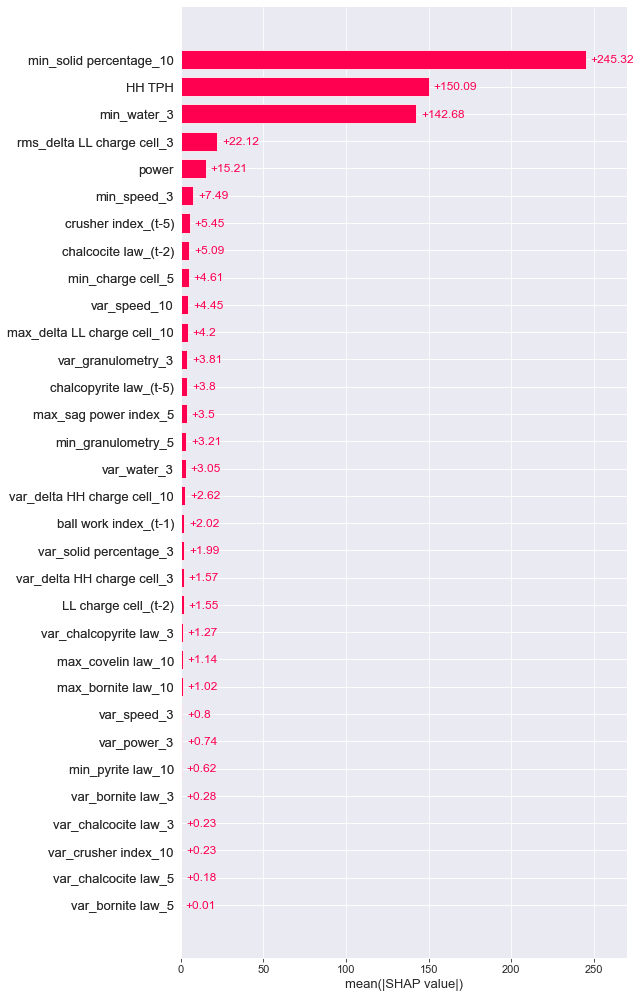

In [27]:
# Bar plot
shap.plots.bar(shap_values, max_display=32)

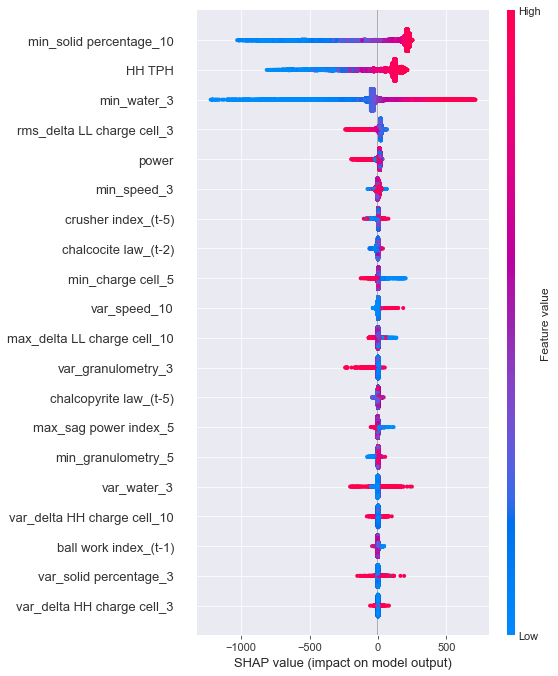

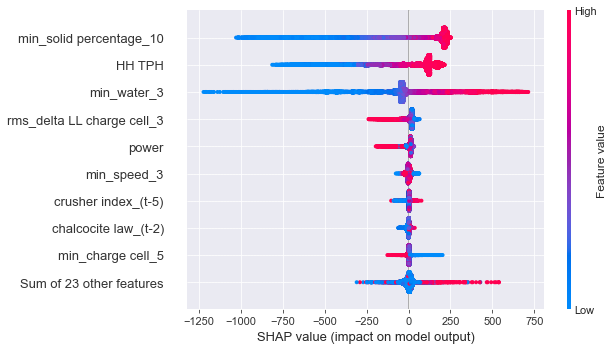

In [28]:
# Summary plot: beeswarm
shap.summary_plot(shap_values)
# or 
shap.plots.beeswarm(shap_values)

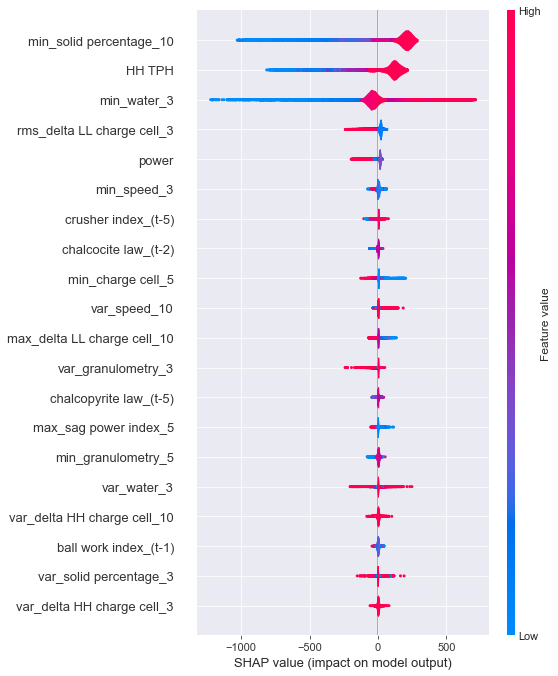

In [29]:
# Summary plot: violin
shap.summary_plot(shap_values, plot_type='violin')

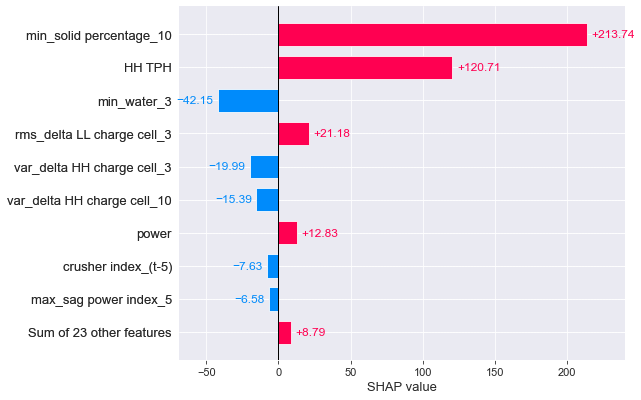

In [30]:
# Local bar plot
shap.plots.bar(shap_values[0])